# Neural networks

--- Reading data

In [1]:
import pandas as pd
import numpy as np
np.random.seed(123)

In [2]:
file = pd.ExcelFile('churn_data_python.xls')

In [3]:
data = file.parse('bigml_5a132e5f7811dd1184001048')

In [4]:
data.head()

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,censor,start,end
0,1,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,0,0,2001-01-01,2003-06-16
1,2,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,0,2001-01-02,2003-01-21
2,3,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,0,2001-01-03,2003-08-20
3,4,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,0,2001-01-04,2002-08-15
4,5,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,0,2001-01-05,2002-06-14


In [5]:
from  sklearn.utils import resample

In [6]:
data_maj = data[data.churn==0]
data_min = data[data.churn==1]

In [7]:
data_min_upsampled = resample(data_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=2850,    # to match majority class
                                 random_state=123) # reproducible results

In [8]:
dataset = pd.concat([data_maj, data_min_upsampled])

In [9]:
X = dataset.iloc[:, 1:18]

In [10]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_ eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [11]:
y = dataset.iloc[:, 18]

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

--- Initializing libraries

In [13]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

C:\Users\Ada\AppData\Local\conda\conda\envs\mgr\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
n_cols = X.shape[1]

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X = sc.fit_transform(X)

--- First neural network model

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(17, input_shape=(n_cols,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
3990/3990 [==============================] - 1s 299us/step - loss: 0.6640 - acc: 0.6103
Epoch 2/100
3990/3990 [==============================] - 0s 69us/step - loss: 0.6073 - acc: 0.6822
Epoch 3/100
3990/3990 [==============================] - 0s 72us/step - loss: 0.5659 - acc: 0.7341
Epoch 4/100
3990/3990 [==============================] - 0s 72us/step - loss: 0.5319 - acc: 0.7594
Epoch 5/100
3990/3990 [==============================] - 0s 78us/step - loss: 0.5046 - acc: 0.7837
Epoch 6/100
3990/3990 [==============================] - 0s 72us/step - loss: 0.4824 - acc: 0.8035
Epoch 7/100
3990/3990 [==============================] - 0s 66us/step - loss: 0.4648 - acc: 0.8145
Epoch 8/100
3990/3990 [==============================] - 0s 64us/step - loss: 0.4502 - acc: 0.8218
Epoch 9/100
3990/3990 [==============================] - 0s 61us/step - loss: 0.4374 - acc: 0.8301
Epoch 10/100
3990/3990 [==============================] - 0s 60us/step - loss: 0.4272 - acc: 0.8328
Epoch 11

In [20]:
keras_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 17)                306       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 18        
Total params: 324
Trainable params: 324
Non-trainable params: 0
_________________________________________________________________


ROC curve on the training set

In [21]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [22]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [23]:
auc_keras

0.9367668042481062

In [24]:
from matplotlib import pyplot as plt

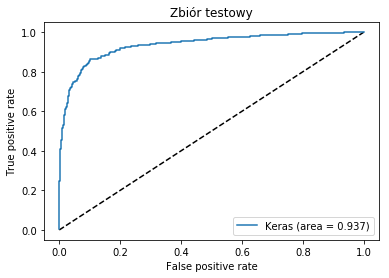

In [25]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Zbiór testowy')
plt.legend(loc='best')
plt.show()

ROC curve on the test set

In [26]:
from sklearn.metrics import roc_curve
y_pred_keras_train = keras_model.predict(X_train).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_pred_keras_train)

In [27]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [28]:
auc_keras

0.9479429572299829

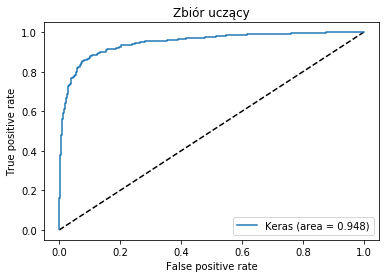

In [29]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Zbiór uczący')
plt.legend(loc='best')
plt.show()

Confusion matrix on the training set

In [30]:
from sklearn.metrics import confusion_matrix 

In [31]:
pred = y_pred_keras>=0.5

In [32]:
confusion = confusion_matrix(y_test,pred)

In [33]:
confusion

array([[757,  90],
       [116, 747]], dtype=int64)

Classification report

In [34]:
from sklearn.metrics import classification_report

In [35]:
classification = classification_report(y_test, pred)
print(classification)

             precision    recall  f1-score   support

          0       0.87      0.89      0.88       847
          1       0.89      0.87      0.88       863

avg / total       0.88      0.88      0.88      1710



In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
acc

0.87953216374269

In [37]:
pred_tr = keras_model.predict(X_train)
pred_tr = pred_tr>=0.5
acc2 = accuracy_score(y_train, pred_tr)
acc2

0.8864661654135338

In [38]:
keras_model.get_weights()

[array([[ 1.74969390e-01, -4.22244430e-01,  2.61682749e-01,
          1.70057952e-01,  2.54722327e-01,  2.99636781e-01,
         -3.66318882e-01, -4.05696295e-02, -5.98923117e-02,
         -3.39457273e-01,  2.90022064e-02,  2.50467390e-01,
         -3.90709043e-02, -2.97637433e-01, -2.07973748e-01,
         -2.07138106e-01,  4.57980424e-01],
        [-2.82356709e-01, -4.72056448e-01,  4.64720726e-01,
         -2.32998729e-01, -2.17463046e-01, -3.69418979e-01,
          4.76067096e-01, -2.16077253e-01, -1.26766896e+00,
         -6.57769144e-01,  2.39328891e-01, -2.29337007e-01,
          4.93284166e-01, -1.28880769e-01, -5.01627564e-01,
         -4.51400995e-01,  1.80063352e-01],
        [ 2.29210034e-01, -7.00729415e-02, -4.42153722e-01,
         -1.37118876e-01,  6.16026163e-01, -5.93115032e-01,
         -3.48468453e-01,  2.88307220e-01,  4.22747552e-01,
          3.77326995e-01,  4.75156726e-03,  5.02856910e-01,
         -7.00491428e-01,  7.00589836e-01,  2.27589220e-01,
          1.